In [49]:
import seaborn
import pandas as pd
import numpy as np
from uncertainties import ufloat,unumpy
from uncertainties.umath import *
import matplotlib.pyplot as plt
import matplotlib
import os

In [45]:
matplotlib.rcParams['figure.figsize'] = (8, 5)
matplotlib.rcParams['font.family'] = "Times New Roman"
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['lines.markerfacecolor'] = 'black'
matplotlib.rcParams['lines.linewidth'] = 1.5

In [3]:
## Setup paths
dirpath = "/Users/suzutsuki-ch/Work/ARMADA/"
save_directory = "/Users/suzutsuki-ch/Work/ARMADA/Targets" ## path for saved files
armada_file = "/Users/suzutsuki-ch/Work/ARMADA/full_target_list.csv" ## path to csv target file
note = 'Chi' ## note for saved files (e.g. 'hip' for hipparcos distance, or 'gaia')

In [4]:
target_hd = '6456'
df = pd.read_csv(armada_file,dtype=object)

## Create directory for saved files, if it doesn't already exist
directory = "%s/HD_%s/"%(save_directory,target_hd)
if not os.path.exists(directory):
    print("Creating directory")
    os.makedirs(directory)

In [5]:
df.columns

Index(['HD', 'HIP', 'P (yr)', 'P_err (yr)', 'a (mas)', 'a_err (mas)', 'e',
       'e_err', 'i (deg)', 'i_err (deg)', 'w (deg)', 'w_err (deg)',
       'bigw (deg)', 'bigw_err (deg)', 'T (mjd)', 'T_err (mjd)',
       'residual (micro-as)', 'HIP_distance (pc)', 'HIP_distance_err (pc)',
       'Gaia_distance (pc)', 'Gaia_distance_err (pc)', 'a_HIP (au)',
       'a_HIP_err (au)', 'a_Gaia (au)', 'a_Gaia_err (au)', 'Mdyn_HIP (Msun)',
       ' Mdyn_HIP_err (Msun)', 'Mdyn_Gaia (Msun)', 'Mdyn_Gaia_err (Msun)',
       'triple', 'SpType (primary?)', 'dmag_speckle_v', 'dmag_speckle_v_err',
       'dmag_speckle_i', 'dmag_speckle_i_err', 'dmag_wds_v', 'dmag_wds_v_err',
       'dmag_h', 'dmag_h_err', 'dmag_k', 'dmag_k_err', 'M1_ph', 'M2_ph',
       'Msum_ph'],
      dtype='object')

In [23]:
Mdyn_HIP = []
Mdyn_Gaia = []
dmag_H = []

for ind in range(0,75):
    Mdyn_HIP.append(ufloat(float(df["Mdyn_HIP (Msun)"][ind]), float(df[" Mdyn_HIP_err (Msun)"][ind])))
    Mdyn_Gaia.append(ufloat(float(df["Mdyn_Gaia (Msun)"][ind]), float(df["Mdyn_Gaia_err (Msun)"][ind])))
    dmag_H.append(ufloat(float(df["dmag_h"][ind]), float(df["dmag_h_err"][ind])))

(0.0, 15.0)

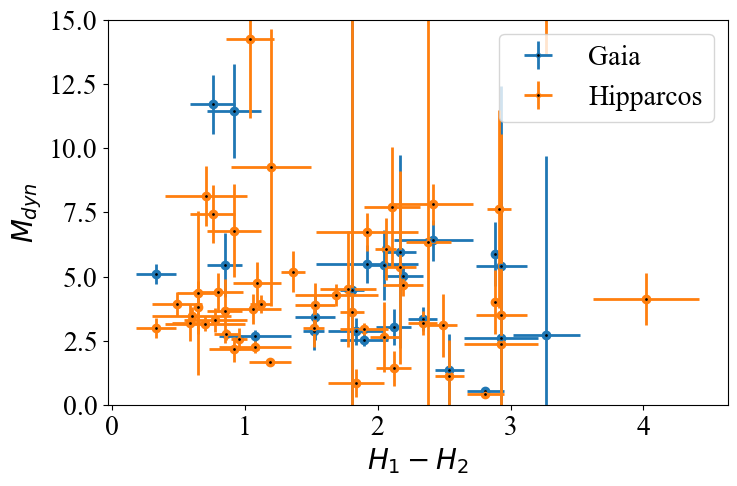

In [56]:
plt.scatter([dm.n for dm in dmag_H], [md.n for md in Mdyn_Gaia])
plt.errorbar([dm.n for dm in dmag_H], [md.n for md in Mdyn_Gaia], 
             xerr = [dm.s for dm in dmag_H], yerr=[md.s for md in Mdyn_HIP], 
             fmt=".", lw=2, label="Gaia")

plt.scatter([dm.n for dm in dmag_H], [md.n for md in Mdyn_HIP])
plt.errorbar([dm.n for dm in dmag_H], [md.n for md in Mdyn_HIP], 
             xerr = [dm.s for dm in dmag_H], yerr=[md.s for md in Mdyn_HIP], 
             fmt=".", lw=2, label="Hipparcos")
plt.legend()
plt.xlabel(r"$H_1 - H_2$")
plt.ylabel(r"$M_{dyn}$")
plt.ylim(0,15)

In [65]:
Targets = []

for i in range(0,5000):
    choice_ind = np.random.choice(np.arange(0,75))
    choice = [dmag_H[choice_ind], Mdyn_HIP[choice_ind]]
    

    while choice[1].n > 10:
        choice_ind = np.random.choice(np.arange(0,75))
        choice = [dmag_H[choice_ind], Mdyn_HIP[choice_ind]]
        
    Targets.append(choice)

In [70]:
MonteCarlo_Mdyn_HIP = []
MonteCarlo_dmag = []

for t in Targets:
    for i in range(0,40):

        d = np.random.normal(t[0].n, t[0].s)
        MonteCarlo_dmag.append(d)

        m = np.random.normal(t[1].n, t[1].s)
        MonteCarlo_Mdyn_HIP.append(m)

        print([d,m])


[2.8790017348570958, 2.455012634960282]
[2.729945186942619, -0.08370315693550134]
[3.164192916772211, 6.3873613600770245]
[3.0423193504379444, 5.484184813579224]
[3.1385468097280045, 4.14360793192745]
[2.9512765420428226, -4.530182415581818]
[2.7970439895053283, 12.90020044419382]
[3.151739142252136, 1.4564745401626258]
[2.9856951346738985, 5.401852673998773]
[2.7390264052191795, 4.363529901494968]
[2.56065828890499, 5.264075097818919]
[3.243937034016896, 4.666897467842359]
[3.1130768587147992, 15.206779908026714]
[3.115945353381674, 4.2156527045233005]
[2.867852202428447, 9.150181885794378]
[2.8677451716272553, 2.300206466594986]
[2.865014839044817, -1.5437962113460717]
[2.684293416923562, 0.7178476542264067]
[2.6331919158904107, 4.136144407225746]
[2.8330485080107546, 6.231023664049108]
[2.8500106843901847, -0.5960304637485265]
[2.7347854060452046, 0.0066653713538533665]
[3.1332944964748437, 5.140117766002311]
[2.8245943291242357, 8.519690967338992]
[2.818706410048743, -2.93729211842

(0.0, 15.0)

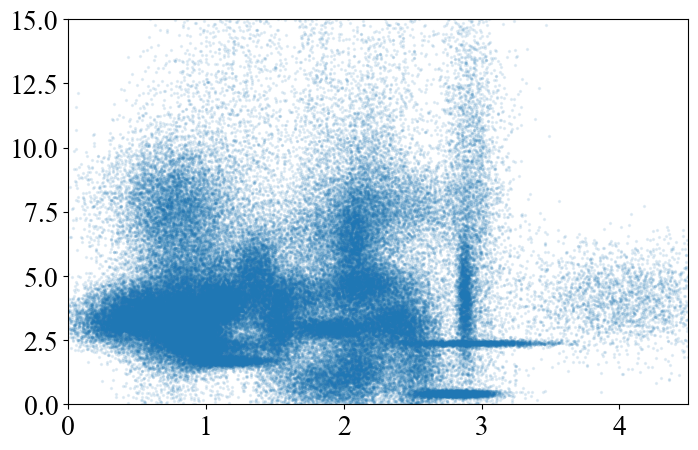

In [71]:
plt.scatter(MonteCarlo_dmag, MonteCarlo_Mdyn_HIP, s=2, alpha=0.1)
plt.xlim(0,4.5)
plt.ylim(0,15)

Text(0, 0.5, '$M_{dyn}$')

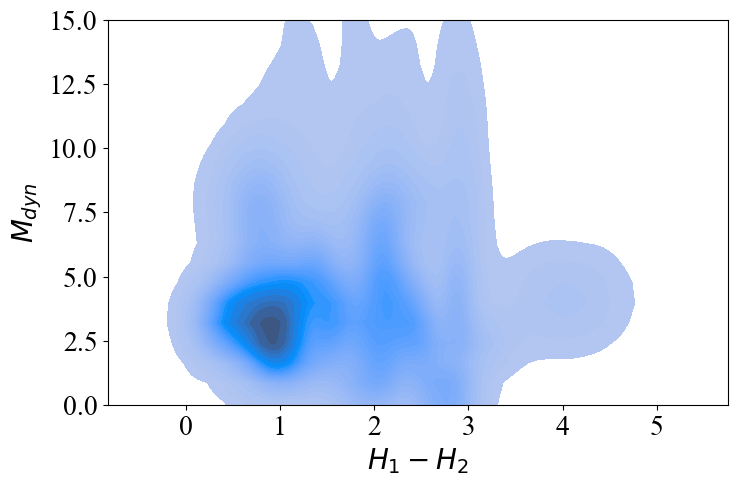

In [72]:
seaborn.kdeplot(x=MonteCarlo_dmag, y=MonteCarlo_Mdyn_HIP, fill=True, color="#00274c", levels=30, thresh=0.05)
plt.ylim(0,15)
plt.xlabel(r"$H_1 - H_2$")
plt.ylabel(r"$M_{dyn}$")


array([-1.77422422,  0.90713136, -1.24196505, -0.53404139, -1.43766912,
        0.25720299, -0.75166886, -1.12002473,  0.19626925, -0.29484847,
        0.63400758,  0.22632002, -2.25907349, -1.19827073,  0.04806462,
       -0.19488416, -0.36020487, -0.33405031, -0.29074345, -0.52228305,
        0.89992213,  0.3479968 , -0.70132092, -0.6664323 , -0.59390977,
        0.31174467,  0.12483113,  1.14550218,  0.55207097, -1.15948908,
        2.01693302,  0.36747249, -0.17822855, -1.10700475, -1.36783306,
       -1.11739436, -0.03873681,  1.18153186,  1.92024944, -2.61553376,
        1.54612057, -0.30460409, -0.59810337, -0.04309901, -1.94077324,
       -0.11690133, -0.7572546 , -0.82847661,  0.42995913, -1.32993916])